In [1]:
# This dataset contains accelerometer and gyroscope readings gathered from participants
# performing a variety of exercises. It includes sensor data from the accelerometer (x, y, z
# axes) and gyroscope (x, y, z axes) across different exercise types and intensities. This data
# is well-suited for analyzing movement patterns, developing activity recognition models,
# and training machine learning algorithms for fitness and health monitoring.

# ● ep (ms): Timestamp in milliseconds, representing the exact recording time.
# ● Acc_x: X-axis acceleration value from the fitness tracker.
# ● Acc_y: Y-axis acceleration value from the fitness tracker.
# ● Acc_z: Z-axis acceleration value from the fitness tracker.
# ● Gyro_x: X-axis rotational velocity (gyroscope) reading.
# ● Gyro_y: Y-axis rotational velocity (gyroscope) reading.
# ● Gyro_z: Z-axis rotational velocity (gyroscope) reading.
# ● ID: Identifier for the individual performing the exercise.
# ● Exercise: Type of exercise or movement (e.g., bench press, overhead press).
# ● Category: Intensity of the exercise (e.g., heavy, medium).
# ● Set: Set number or batch identifier for the recorded session.

# Questions :
# 1- Write a function to generate a scatter plot for a pair of attributes.
# - Write a function to generate a histogram (and Bar chart) for an attribute.
# 3- Write a function to generate a box plot for an attribute, both with and without outliers.

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import datetime

df = pd.read_csv("DatasetExos.csv",nrows=5000, sep=',')

#affichage de colonne du dataset
columns = df.columns
print("les colonnes du dataset sont", columns)

les colonnes du dataset sont Index(['ep (ms)', 'Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', 'Gyro_y', 'Gyro_z',
       'ID', 'Exercise', 'Category', 'Set'],
      dtype='object')


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ep (ms)   4992 non-null   object 
 1   Acc_x     4997 non-null   float64
 2   Acc_y     5000 non-null   float64
 3   Acc_z     4999 non-null   float64
 4   Gyro_x    4999 non-null   float64
 5   Gyro_y    4993 non-null   float64
 6   Gyro_z    5000 non-null   float64
 7   ID        5000 non-null   object 
 8   Exercise  5000 non-null   object 
 9   Category  4999 non-null   object 
 10  Set       4996 non-null   float64
dtypes: float64(7), object(4)
memory usage: 429.8+ KB


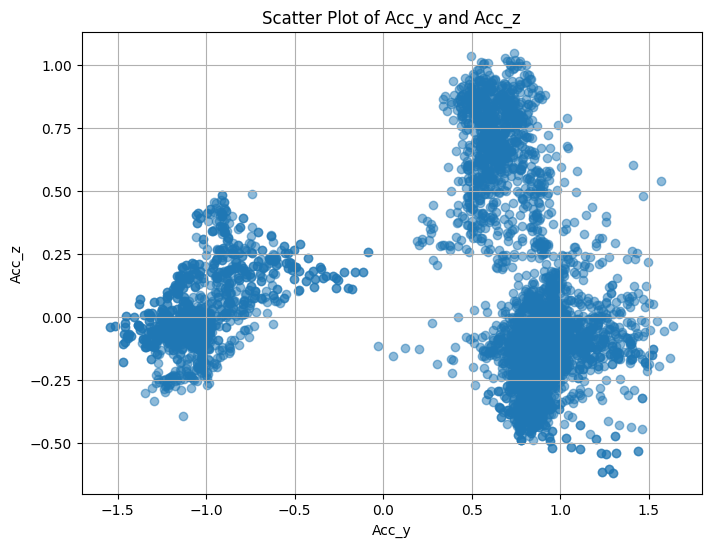

In [4]:
# question 1 : generate scatter plot for pair of attributes 

def scatter_plot(df, x_attr, y_attr):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_attr], df[y_attr], alpha=0.5)
    plt.grid(True)
    plt.xlabel(x_attr)
    plt.ylabel(y_attr)
    plt.title(f'Scatter Plot of {x_attr} and {y_attr}')
    plt.show()
    
scatter_plot(df, 'Acc_y', 'Acc_z')



Plotting of histograms


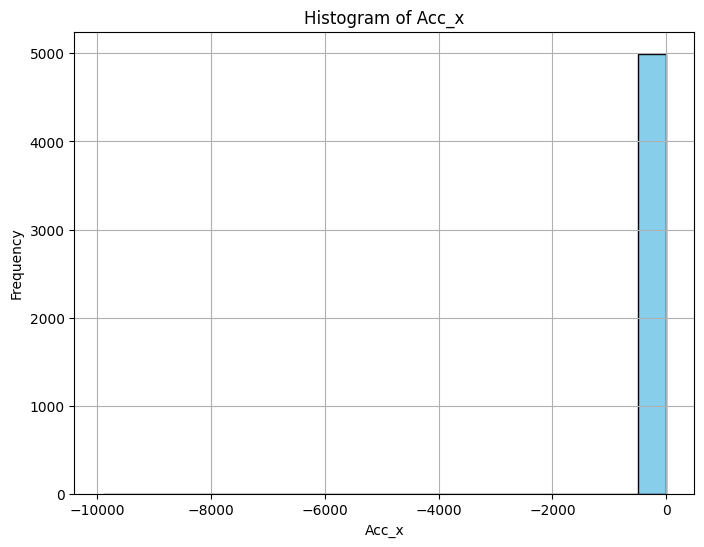

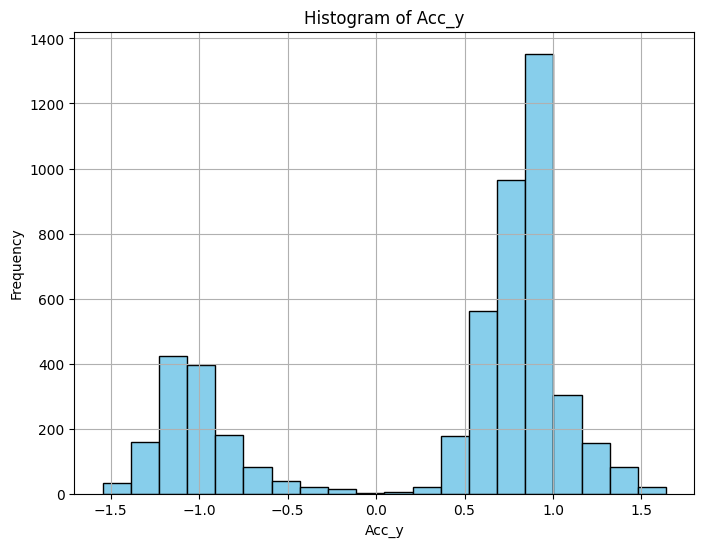

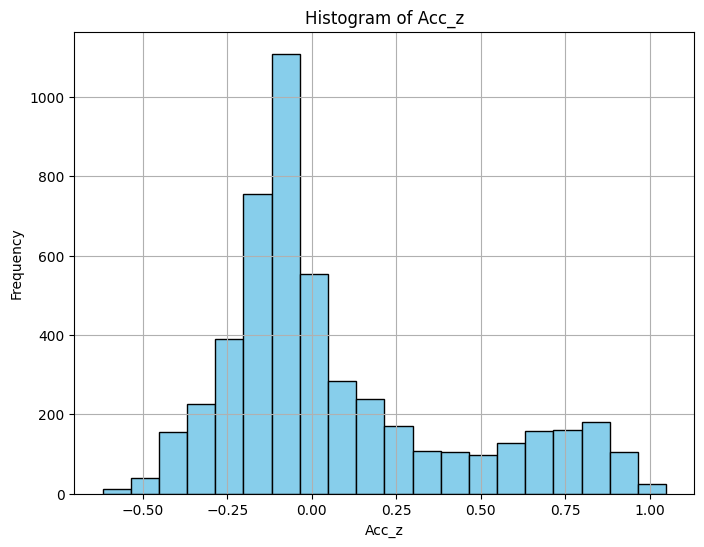

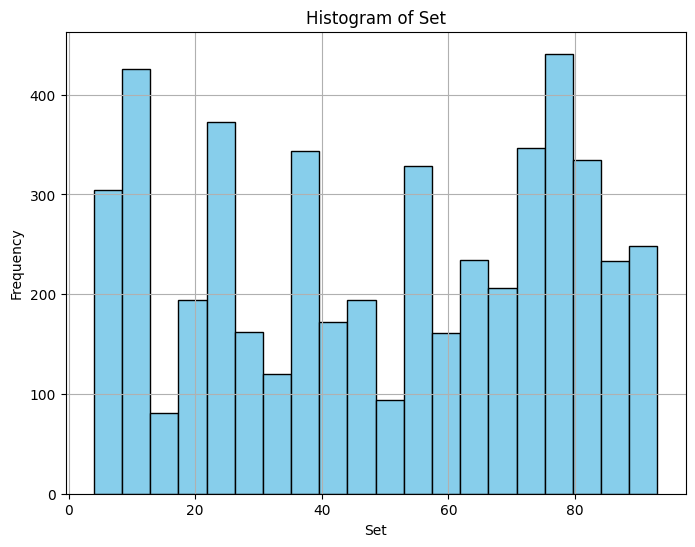

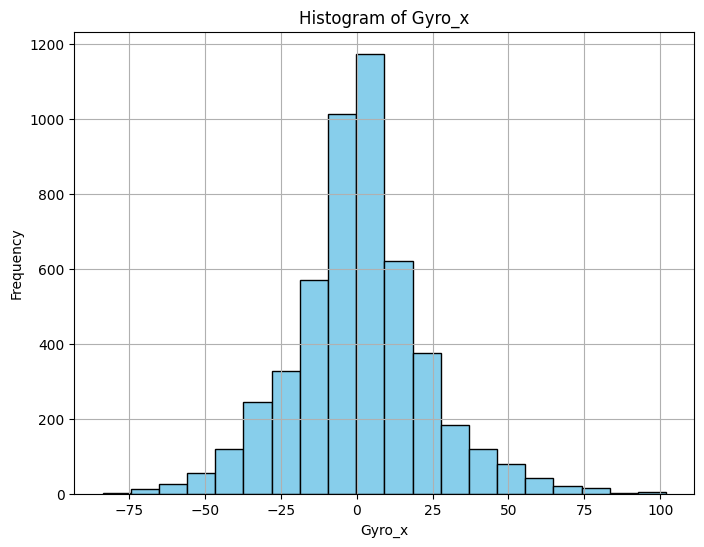

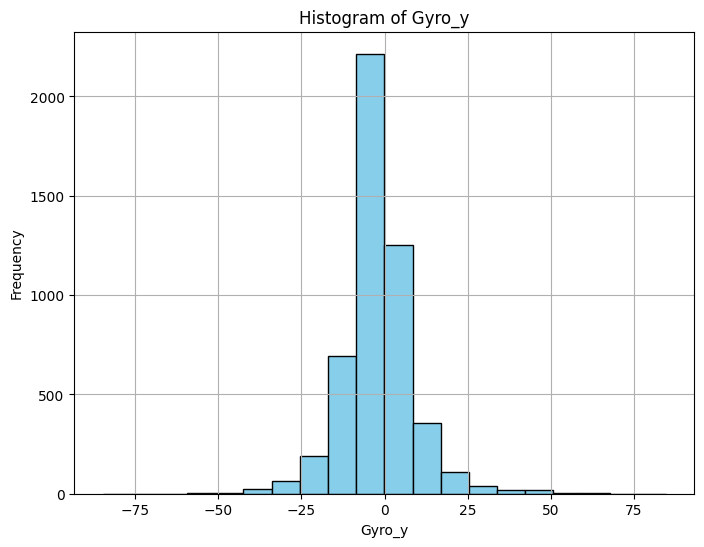

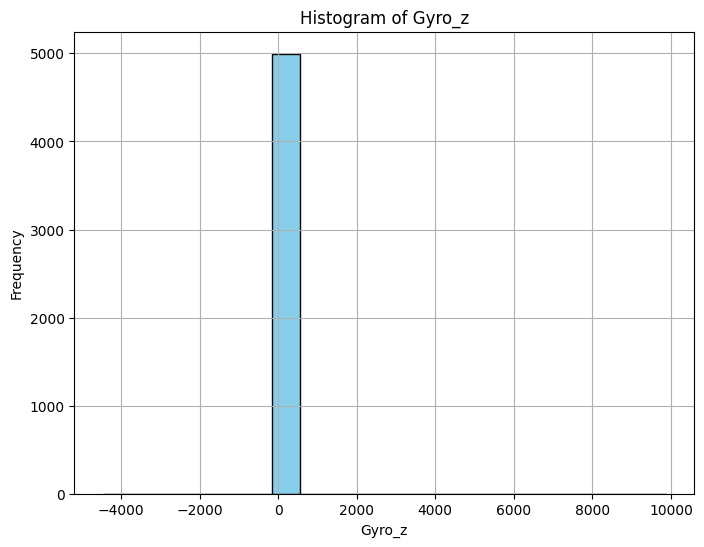

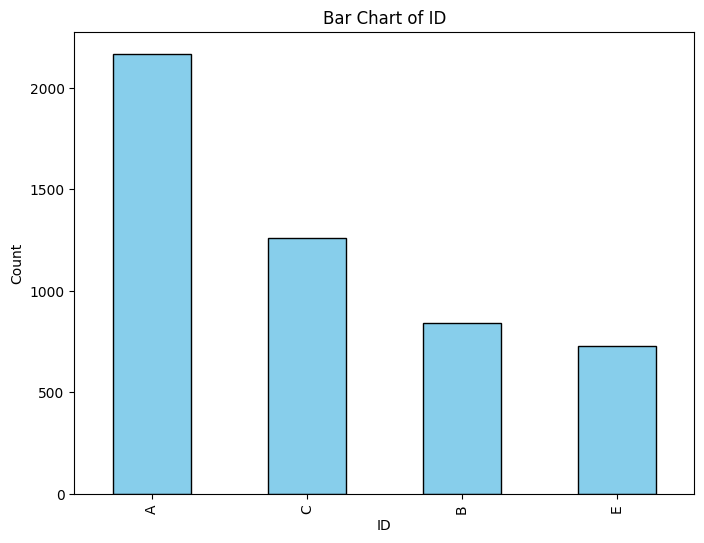

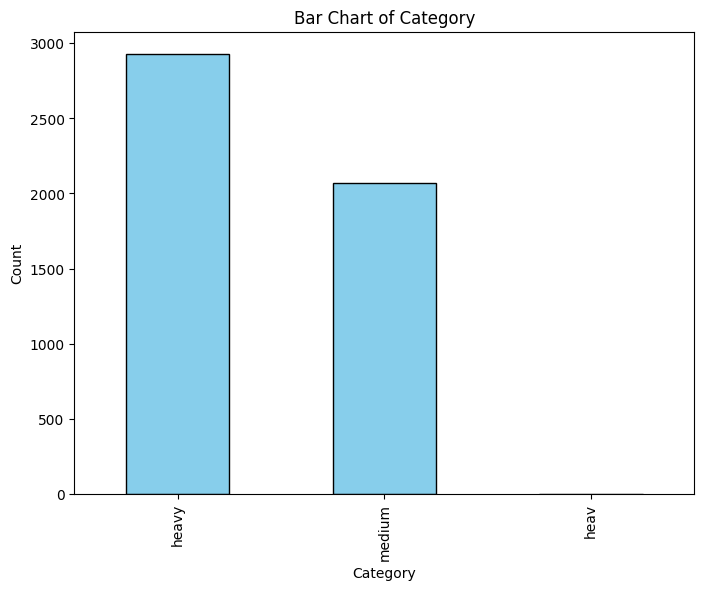

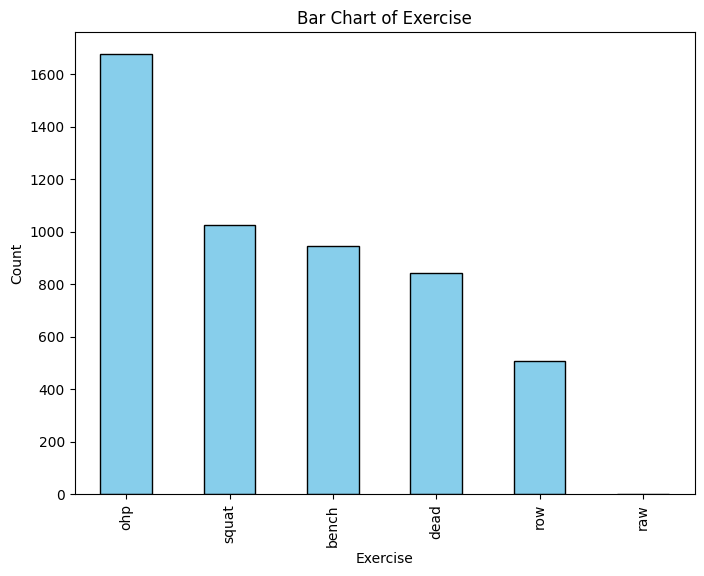

In [5]:
# question 2 : generate a histogram (and Bar chart) for an attribute.
def histogram(df, attr):
    # figure caracteristiques 
    plt.figure(figsize=(8, 6))
    plt.grid(True)
    
    cleaned_values = attr[~pd.isna(attr)]
    if len(cleaned_values) == 0:
        print("no values to plot")
        return

    if pd.api.types.is_numeric_dtype(df[attr]):
        plt.hist(df[attr], bins=20, color='skyblue', edgecolor='black')
        plt.xlabel(attr)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {attr}')
    else:
        df[attr].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.xlabel(attr)
        plt.ylabel('Count')
        plt.title(f'Bar Chart of {attr}')
    
    plt.show()

print('Plotting of histograms')

#plotting of attributes that have frequencies of each value
histogram(df, 'Acc_x')
histogram(df, 'Acc_y')
histogram(df, 'Acc_z')
histogram(df, 'Set')
histogram(df, 'Gyro_x')
histogram(df, 'Gyro_y')
histogram(df, 'Gyro_z')

#plotting of attributes that have counts of each element
histogram(df, 'ID')
histogram(df, 'Category')
histogram(df, 'Exercise')



Plotting line plots for attributes


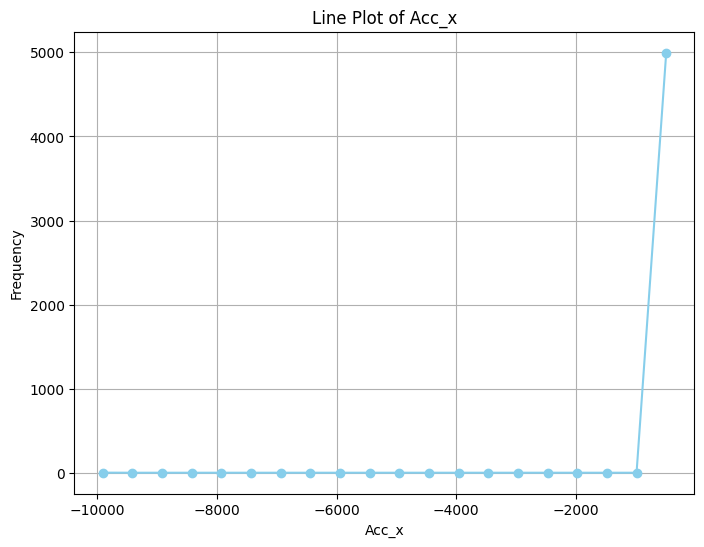

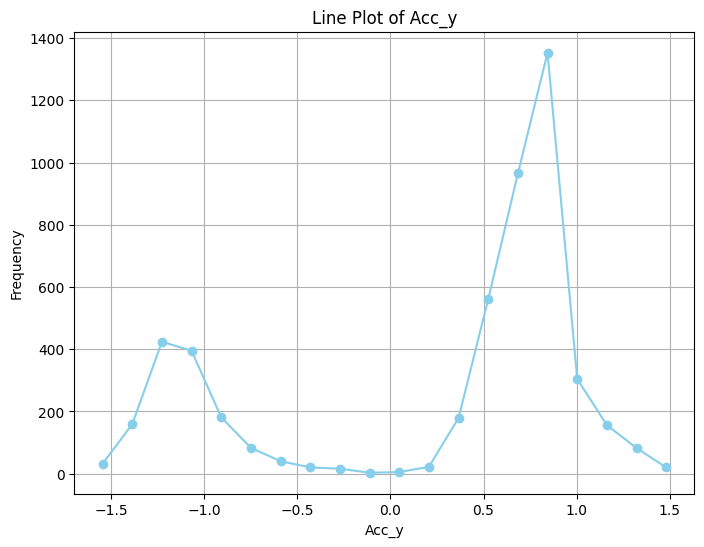

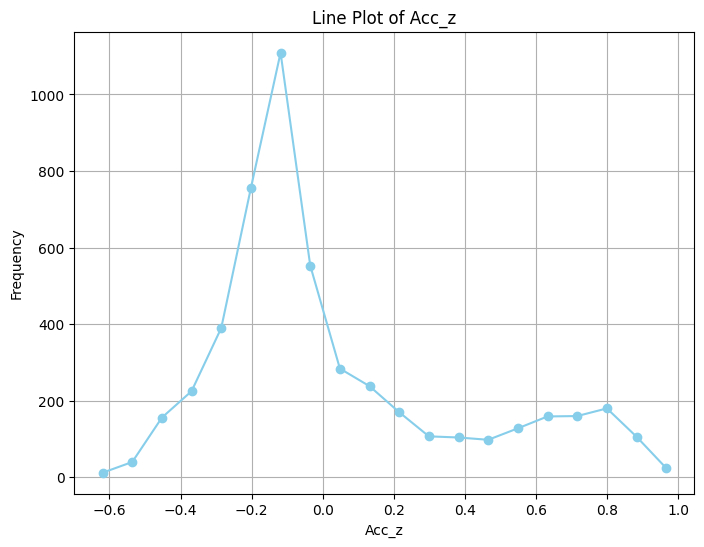

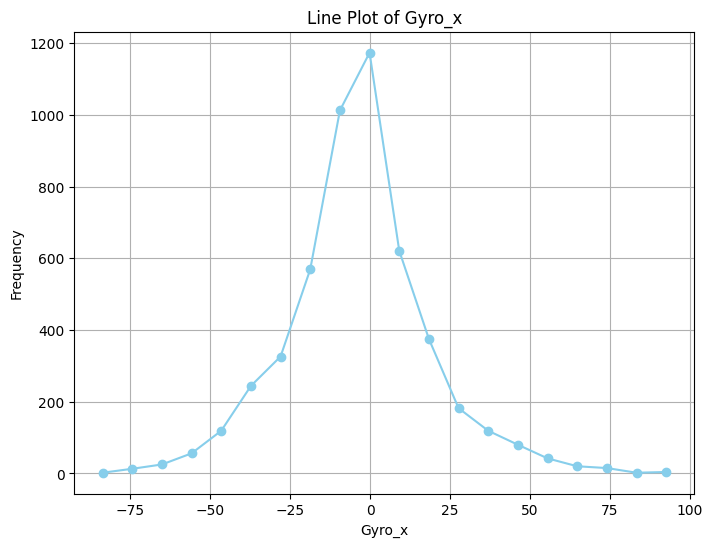

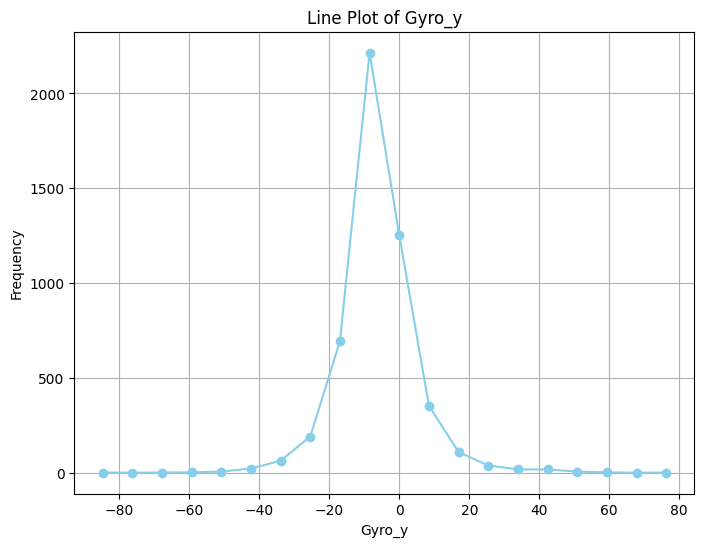

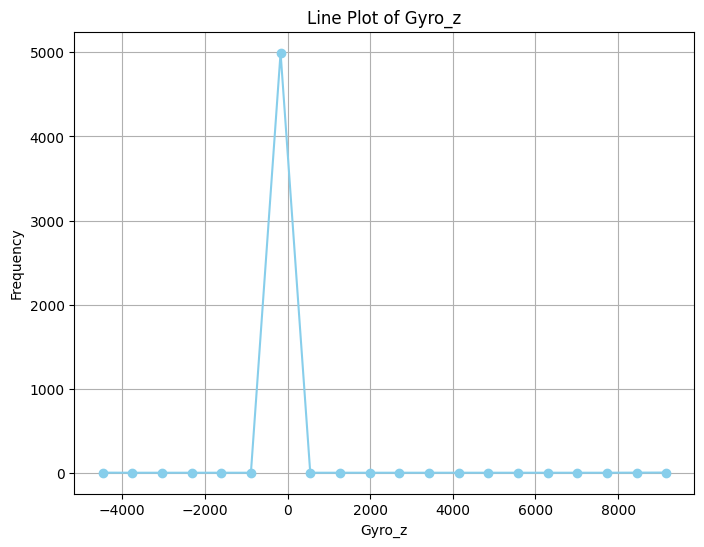

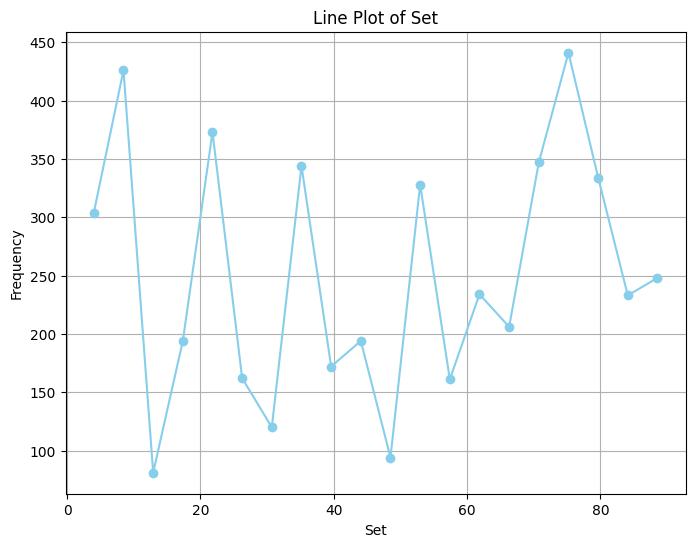

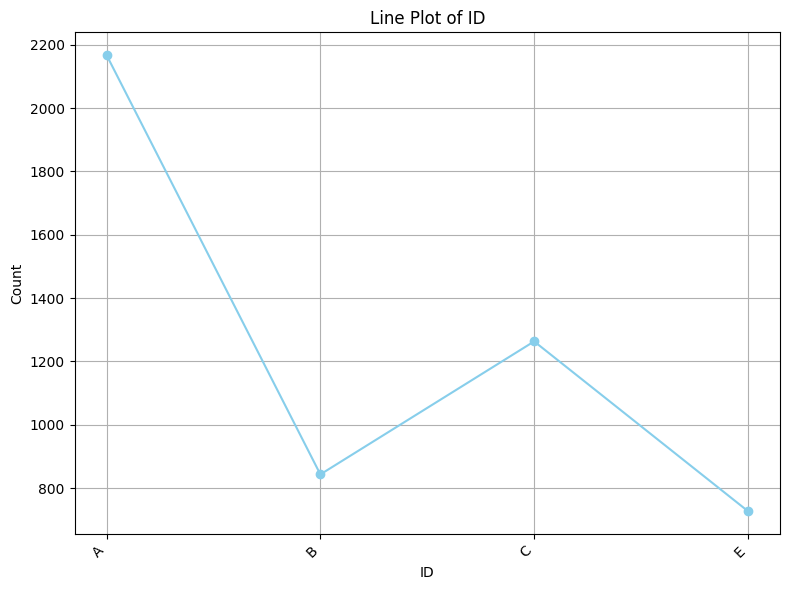

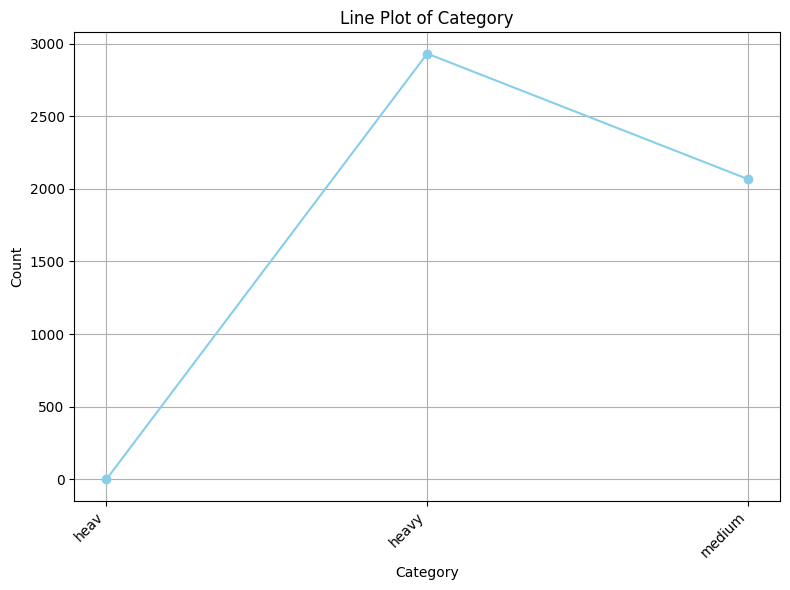

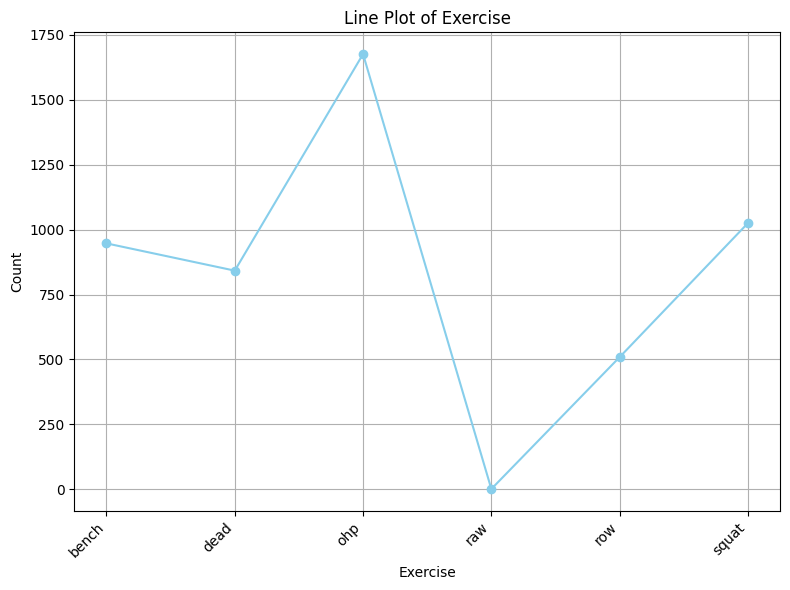

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def line_plot(df, attr, bins=20):
    # Figure characteristics
    plt.figure(figsize=(8, 6))
    plt.grid(True)
    
    cleaned_values = df[attr].dropna()
    if len(cleaned_values) == 0:
        print(f"No values to plot for {attr}")
        return

    # Numerical attributes
    if pd.api.types.is_numeric_dtype(df[attr]):
        counts, bin_edges = np.histogram(cleaned_values, bins=bins)
        plt.plot(bin_edges[:-1], counts, marker='o', color='skyblue')
        plt.xlabel(attr)
        plt.ylabel('Frequency')
        plt.title(f'Line Plot of {attr}')
    else:
        # Non-numerical attributes
        unique_values, counts = np.unique(cleaned_values, return_counts=True)
        plt.plot(np.arange(len(unique_values)), counts, marker='o', color='skyblue')
        plt.xticks(np.arange(len(unique_values)), unique_values, rotation=45, ha='right')
        plt.xlabel(attr)
        plt.ylabel('Count')
        plt.title(f'Line Plot of {attr}')
        plt.tight_layout()
    
    plt.show()

print('Plotting line plots for attributes')

# Plotting numerical attributes
line_plot(df, 'Acc_x', bins=20)
line_plot(df, 'Acc_y', bins=20)
line_plot(df, 'Acc_z', bins=20)
line_plot(df, 'Gyro_x', bins=20)
line_plot(df, 'Gyro_y', bins=20)
line_plot(df, 'Gyro_z', bins=20)
line_plot(df, 'Set', bins=20)


# Plotting non-numerical attributes
line_plot(df, 'ID')
line_plot(df, 'Category')
line_plot(df, 'Exercise')


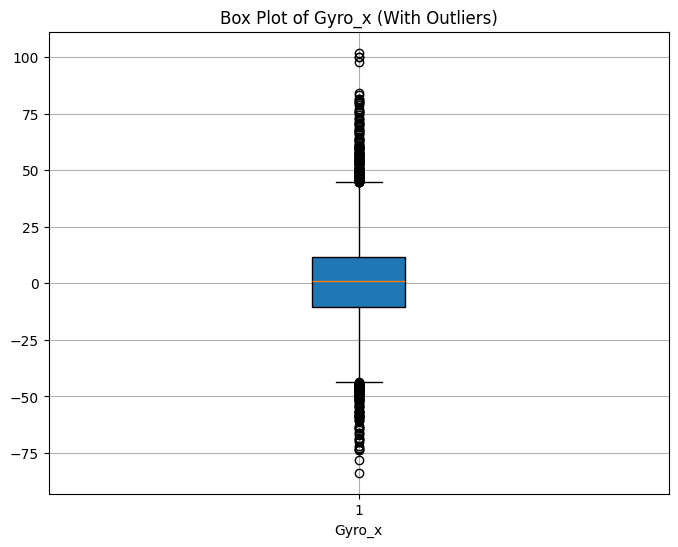

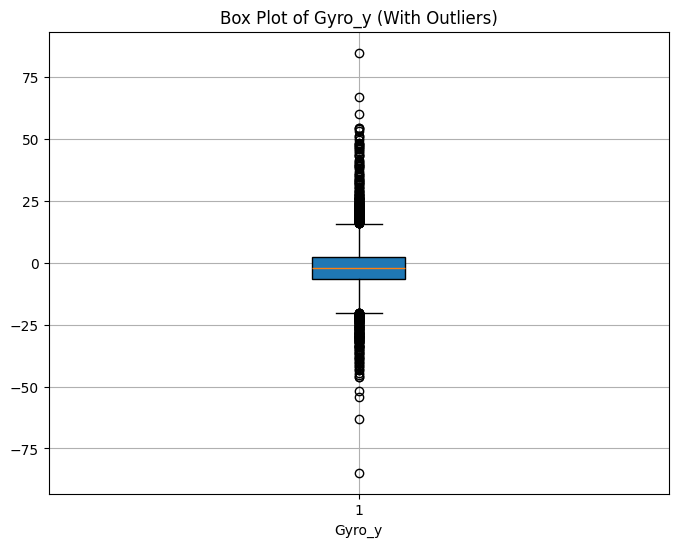

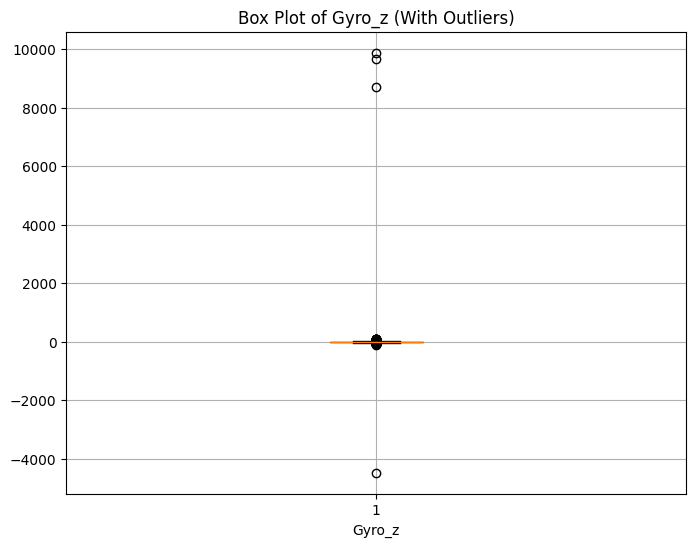

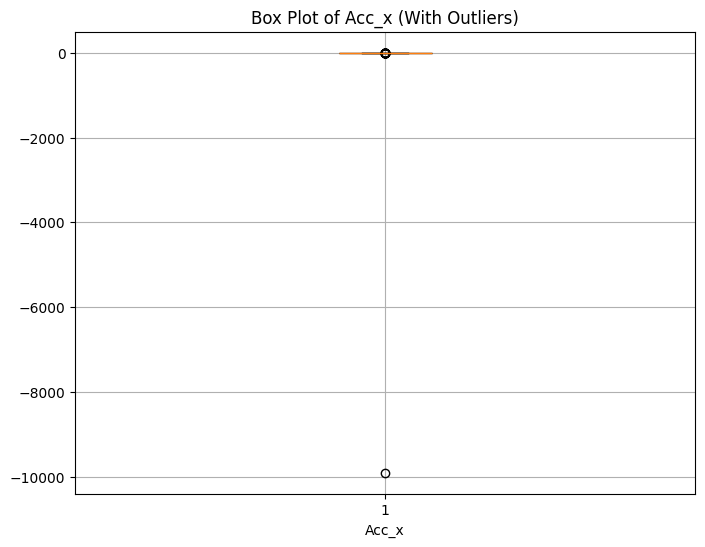

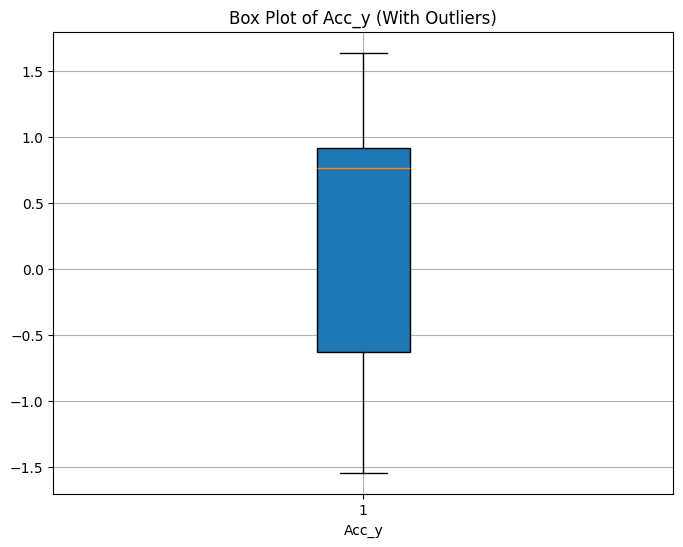

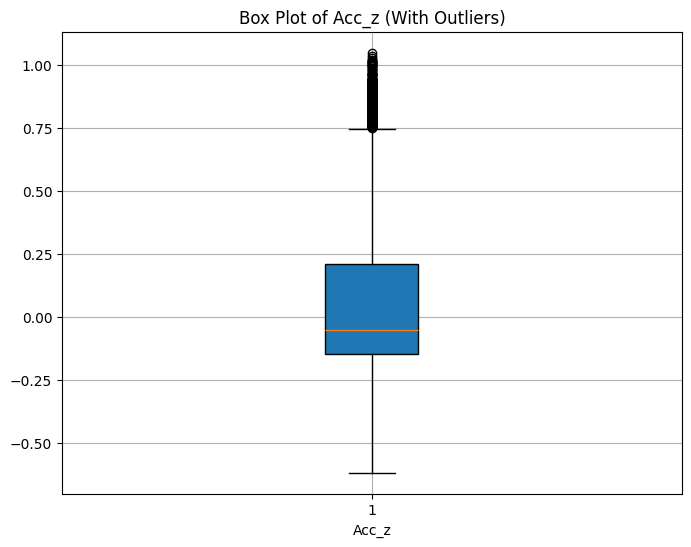

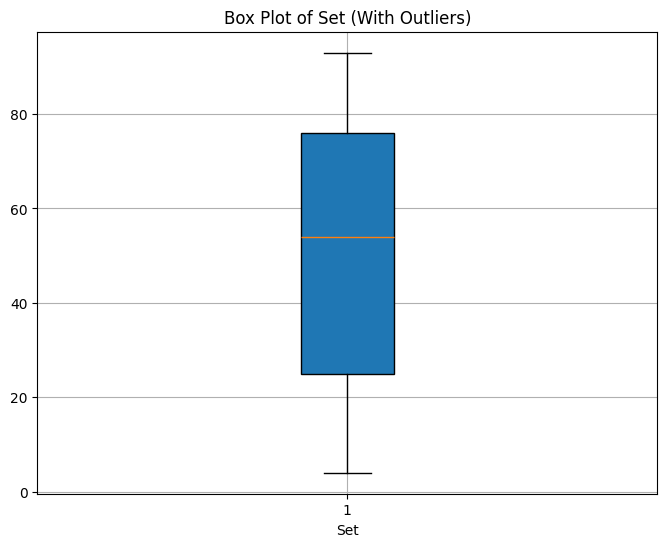

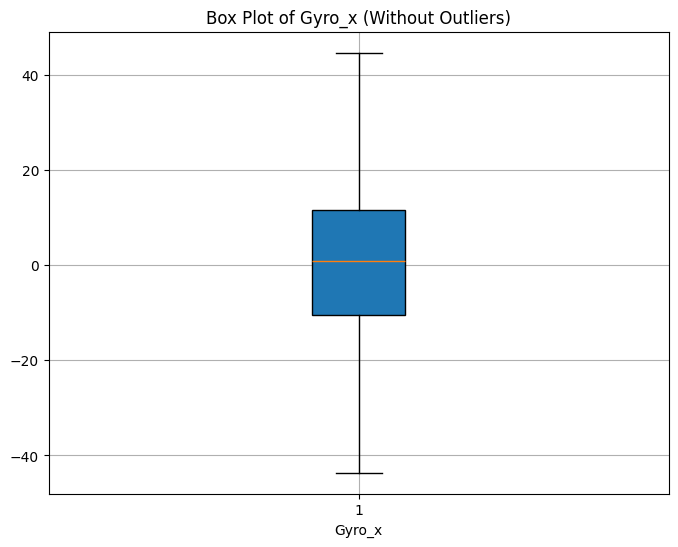

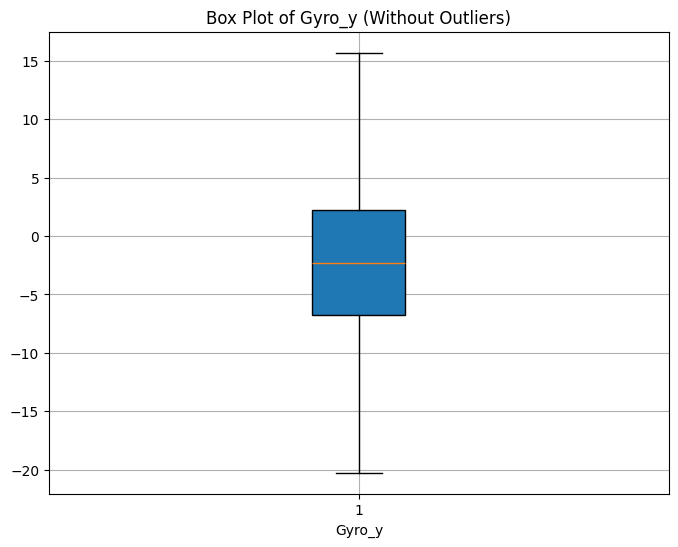

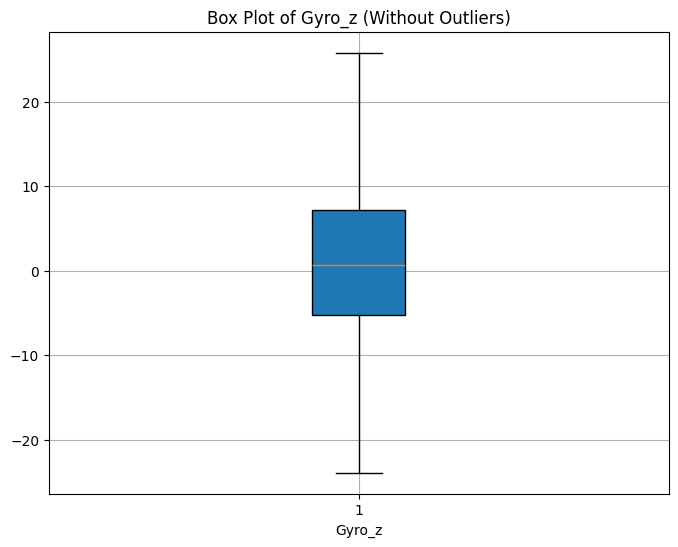

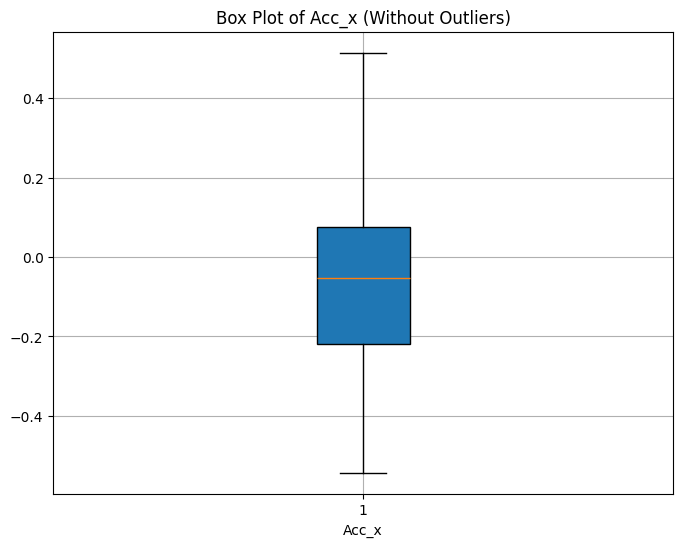

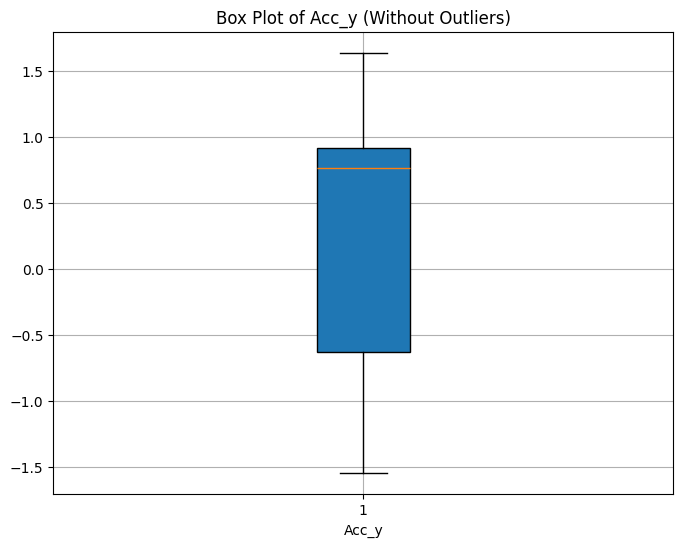

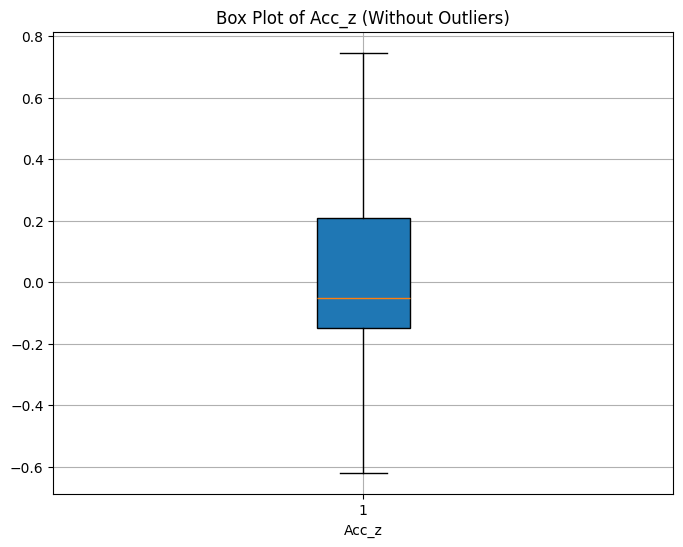

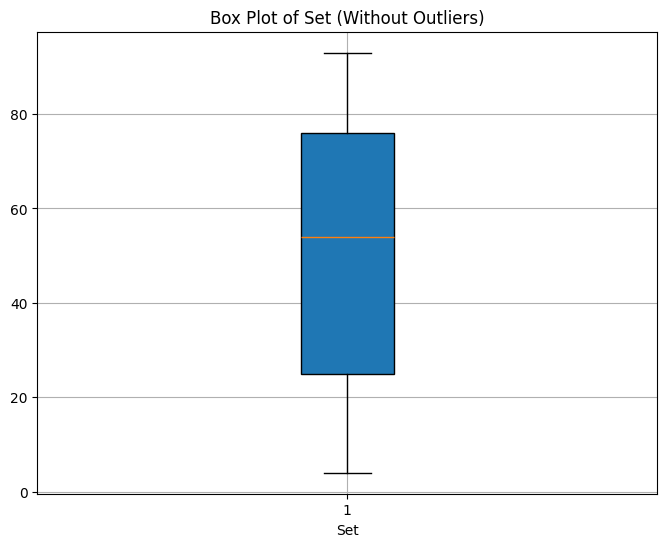

In [7]:
# question 3 box plot for an attribute, both with and without outliers.
def box_plot1(df, attr, show_outliers=True):
   
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=attr, showfliers=show_outliers)
    plt.xlabel(attr)
    plt.title(f'Box Plot of {attr} {"with" if show_outliers else "without"} Outliers')
    plt.grid(True)
    plt.show()



def box_plot(df, attr, show_outliers=True):
    # Check if there are valid (non-NaN) values to plot
    cleaned_values = df[attr].dropna()
    if len(cleaned_values) == 0:
        print(f"No values to plot for {attr}")
        return

    plt.figure(figsize=(8, 6))
    plt.grid(True)
    
    # Plot box plot with or without outliers
    plt.boxplot(cleaned_values, vert=True,patch_artist=True,showfliers=show_outliers)
    plt.xlabel(attr)
    plt.title(f'Box Plot of {attr} ({"With" if show_outliers else "Without"} Outliers)')
    
    plt.show()
# with outliers 
box_plot(df, 'Gyro_x', show_outliers=True)
box_plot(df, 'Gyro_y', show_outliers=True)
box_plot(df, 'Gyro_z', show_outliers=True)
box_plot(df, 'Acc_x', show_outliers=True)
box_plot(df, 'Acc_y', show_outliers=True)
box_plot(df, 'Acc_z', show_outliers=True)
box_plot(df, 'Set', show_outliers=True)

# without outliers 
box_plot(df, 'Gyro_x', show_outliers=False)
box_plot(df, 'Gyro_y', show_outliers=False)
box_plot(df, 'Gyro_z', show_outliers=False)
box_plot(df, 'Acc_x', show_outliers=False)
box_plot(df, 'Acc_y', show_outliers=False)
box_plot(df, 'Acc_z', show_outliers=False)
box_plot(df, 'Set', show_outliers=False)
